# **This Notebook shows how to calculate Shapley value for feature importance measurment in Regression Tasks**

## Dataset is Housing Price dataset from Kaggle

In [37]:
## import necessary modules
! pip install seaborn
import numpy as np # linear algebra
import pandas as pd # for data frames
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import os

Defaulting to user installation because normal site-packages is not writeable


In [38]:
for dirname, _, filenames in os.walk('\housing_csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.getcwd())


C:\STUDY\Mooc\machine learning\Shapley


In [39]:
## read the housing price data as a dataframe and print the first few lines 

## the target variable is the median_house_value

df = pd.read_csv('housing_csv/housing.csv')
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
## print some summary information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data preprocessing: Dealing With Missing values

In [41]:
## The total_bedroom feature has some missing values

## Performing some EDA to look at the distribution of its values

df['total_bedrooms'].value_counts().head(10)




280.0    55
331.0    51
345.0    50
343.0    49
393.0    49
328.0    48
348.0    48
394.0    48
272.0    47
309.0    47
Name: total_bedrooms, dtype: int64

In [42]:
# imputing the mssing bedrooms values by median

df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

## check if the missing values have been properly imputed
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:>

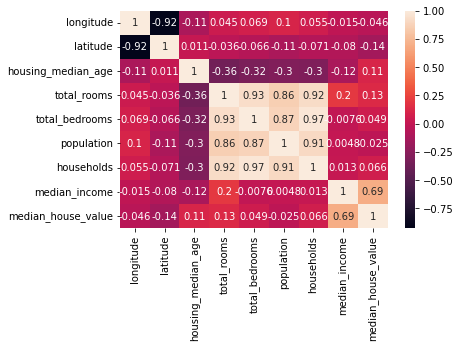

In [43]:
sns.heatmap(df.corr(), annot = True)

In [44]:
 #Declare feature vector and target variable
    
features = ['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']
X= df[features]
y = df['median_house_value']

In [45]:
#Split the data into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

### Model Building: Starting with a random forest 


In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=21, n_estimators=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### evaluate the performance of the random forest model

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

67518.2674294645

In [51]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [54]:
#calculate the Pearson Correlation coefficient for scale invariance

import scipy
scipy.stats.pearsonr(y_pred, y_test)

(0.8149502622115969, 0.0)

In [56]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


## Use the Shap library and calculate the Shapley value

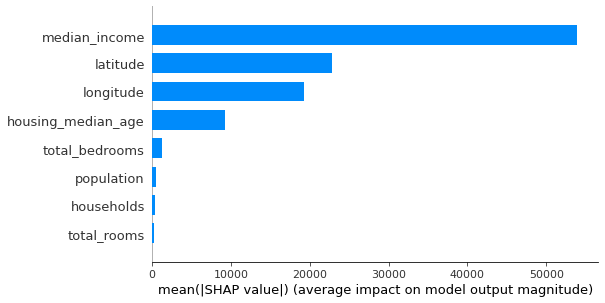

In [57]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")